In [1]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
#svc用在classfication SVR用在regession
from sklearn.linear_model import  LogisticRegression
iris = load_iris()

In [2]:
clf = SVC(kernel='linear')
clf.fit(iris.data,iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [3]:
clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
x = iris.data[0:100,[2,3]]
y = iris.target[0:100]
clf1 = SVC(kernel='linear')
#svc中可以设置C 表示正规化项，比如 C = 1.0 或 C = 100000
clf1.fit(x,y)
clf2 = LogisticRegression()
clf2.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
def plot_estimator(estimator,x,y):
    x_min,x_max = x[:,0].min() - 1 , x[:,0].max() + 1
    y_min,y_max = x[:,1].min() - 1 , x[:,1].max() + 1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
    z = estimator.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    plt.plot()
    plt.contourf(xx,yy,z,alpha = 0.4,cmap = plt.cm.RdYlBu)
    plt.scatter(x[:,0],x[:,1],c = y, cmap = plt.cm.brg)
    plt.xlabel('Petal.length')
    plt.ylabel('Petal.Width')
    plt.show()


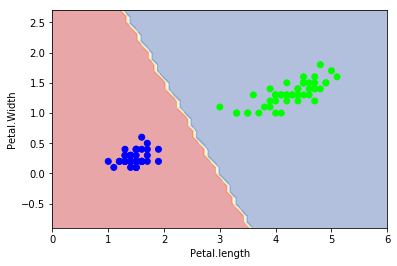

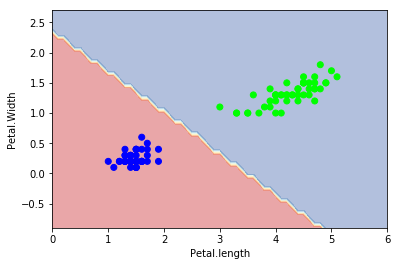

In [14]:
plot_estimator(clf1,x,y)
plot_estimator(clf2,x,y)

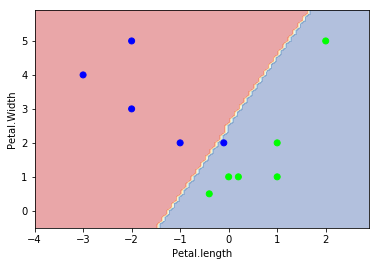

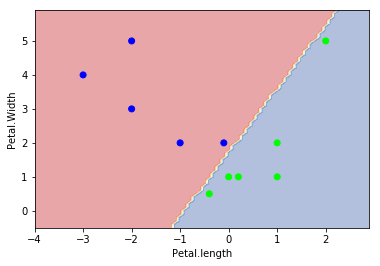

In [24]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1],[1,1,1],[-0.4,0.5,1],[2,5,1]])
x = data[:, :2]
y = data[:,2]

clf = SVC(C = 1.0 ,kernel= 'linear')
clf.fit(x,y)
plot_estimator(clf,x,y)

clf = SVC(C = 100000 ,kernel= 'linear')
clf.fit(x,y)
plot_estimator(clf,x,y)

## 引入rbf和poly

In [27]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
iris = load_iris()
x = iris.data[:,[2,3]]
y = iris.target

clf1 = SVC(kernel='rbf')
clf1.fit(x,y)
clf2 = SVC(kernel='poly')
clf2.fit(x,y)
clf3 = SVC(kernel='linear')
clf3.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 比较不同的Kernel Function

In [28]:
#产生一系列的因子
 x_min,x_max = x[:,0].min() - 1 , x[:,0].max() + 1
 y_min,y_max = x[:,1].min() - 1 , x[:,1].max() + 1
 xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

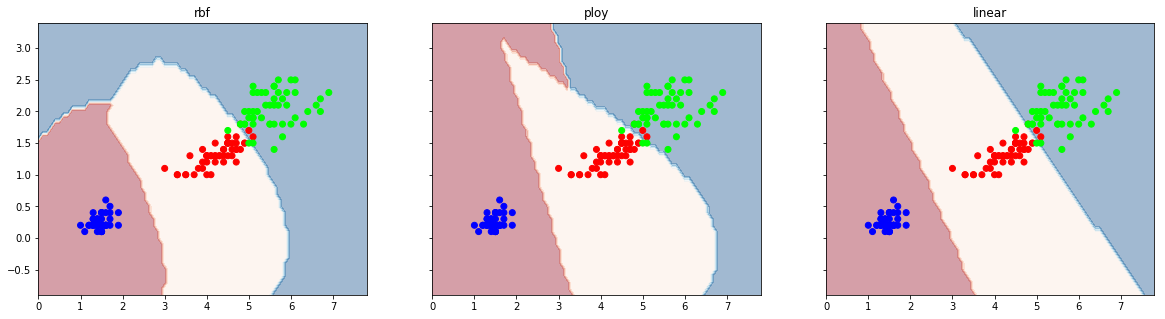

In [34]:
f,axarr = plt.subplots(1,3,sharex = 'col',sharey = 'row',figsize = (20,5))
for idx,clf,title in zip([0,1,2],[clf1,clf2,clf3],['rbf','ploy','linear']):
    z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    axarr[idx].contourf(xx,yy,z,alpha = 0.4,cmap = plt.cm.RdBu)
    axarr[idx].scatter(x[:,0],x[:,1],c=y,cmap = plt.cm.brg)
    axarr[idx]. (title)
plt.show()